# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [3]:
epochs = 30

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [4]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [5]:
# your code here()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


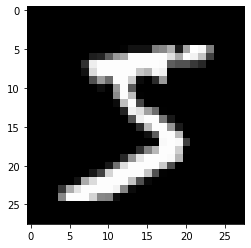

In [6]:
# your code here
plt.imshow(x_train[0], cmap='gray')

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [7]:
# your code here
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
num_components = 2
pca = PCA(n_components=num_components).fit(x_train_flat)
pca_latent_train = pca.transform(x_train_flat)

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


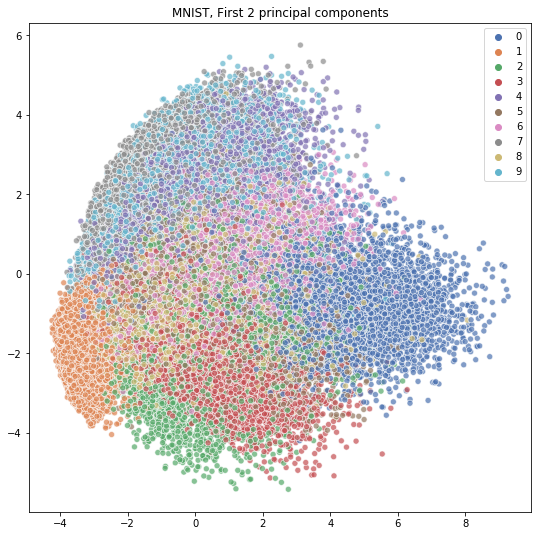

In [34]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(9,9))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10), alpha=(0.7), ax=ax)
ax.set_title("MNIST, First 2 principal components");


**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [9]:
# your code here
# Code Via https://blog.keras.io/building-autoencoders-in-keras.html
from keras.layers import Input, Dense
from keras.models import Model
input_img = Input(shape=(784,))
encoded = Dense(2, activation='linear', use_bias=False)(input_img)
decoded = Dense(784, activation='linear', use_bias=False)(encoded)
lae = Model(input_img, decoded)
linear_encoder = Model(input_img, encoded)
encoded_input = Input(shape=(2,))
decoder_layer = lae.layers[-1]
linear_decoder = Model(encoded_input, decoder_layer(encoded_input))
print("Encoder Summary")
linear_encoder.summary()
print("Decoder Summary")
linear_decoder.summary()
print("Autoencoder Summary")
lae.compile(optimizer='adam', loss='mean_squared_error')
lae.summary()



Using TensorFlow backend.


Encoder Summary
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
Decoder Summary
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
Autoen

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [10]:
# your code here
x_train_flat = x_train.reshape(x_train.shape[0], 784)
x_test_flat = x_test.reshape(x_test.shape[0], 784)
history = lae.fit(x_train_flat, x_train_flat, epochs=epochs, validation_data=(x_test_flat, x_test_flat))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.0600 - val_loss: 0.0578
Epoch 2/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0579 - val_loss: 0.0579
Epoch 3/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 4/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 5/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 6/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 7/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 8/30
60000/60000 [==============================] - 5s 77us/step - loss: 0.0579 - val_loss: 0.0578
Epoch 9/30
60000/60000 [==============================] - 5s 78us/step - loss: 0.0579 - val_loss: 0.0578
Epoch

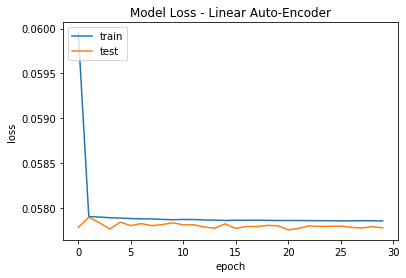

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - Linear Auto-Encoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [12]:
# your code here

second_layer_output = Model([lae.layers[0].input],
                                  [lae.layers[1].output])

lae_latent_train = second_layer_output.predict(x_train_flat)




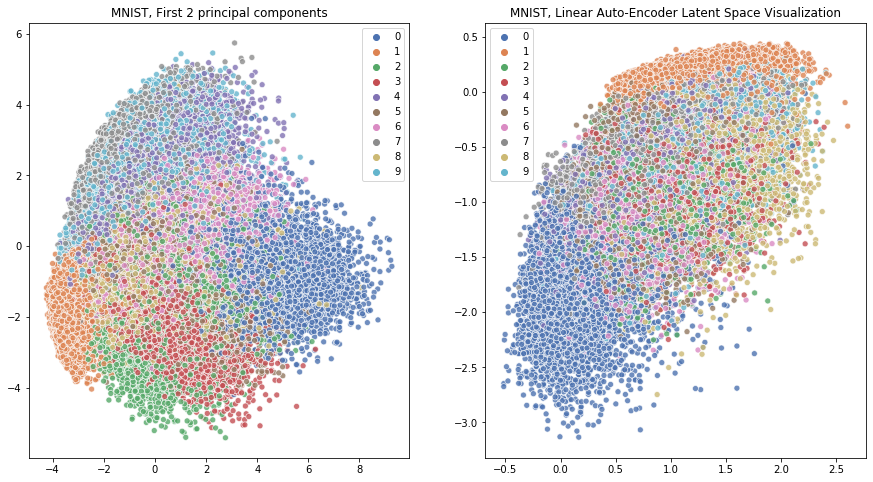

In [35]:
# your code here
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10), alpha=(0.8), ax=ax1)
ax1.set_title("MNIST, First 2 principal components");
sns.scatterplot(x=lae_latent_train[:,0], y=lae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10), alpha=(0.8), ax=ax2)
ax2.set_title("MNIST, Linear Auto-Encoder Latent Space Visualization");


**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


Both the latent space representation and the top two components of PCA are attempting to reduce the dimensionality of our data to 2. From the plots above, it seems that while both show some clear clustering, particularly for 0 and 1, PCA does a better job of distinguishing the letter than our linear auto-encoder does. However, this determination is purely empirical.

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


I would not expect a significantly better reconstruction error, as adding more linear terms won't really capture any more of the variance in the data. Moreover, at a certain point we are still limited by the bottleneck at the middle of the autoencoder, and we would see significantly better results if we increased the dimensionality of the bottleneck. Better results could also be achieved by adding terms with biases and non-linear (relu, etc.) activation terms.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [14]:
# your code here
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.models import Model
encoding_dim = 2  #
# decoder_input = Dense(256, input_shape=(2,), activation='relu')


encoder_1 = Dense(512, activation='relu', input_shape=(784,))
encoder_2 = Dense(256, activation='relu')
bottleneck = Dense(2, activation='relu')
decoder_1 = Dense(256, input_shape=(2,), activation='relu')
decoder_2 = Dense(512, activation='relu')
decoder_output = Dense(784, activation='relu')
encoder = Sequential([encoder_1, encoder_2, bottleneck])
decoder = Sequential(
    [decoder_1, decoder_2, decoder_output])
ae = Sequential([encoder_1, encoder_2, bottleneck,
                 decoder_1, decoder_2, decoder_output])
print("Encoder Summary")
encoder.summary()
print("Decoder Summary")
decoder.summary()
print("Autoencoder Summary")
ae.compile(optimizer='adam', loss='mean_squared_error')
ae.summary()

Encoder Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 533,762
Trainable params: 533,762
Non-trainable params: 0
_________________________________________________________________
Decoder Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_7 (Dense)              (None, 512)               13158

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [15]:
# your code here

history = ae.fit(x_train_flat, x_train_flat, epochs=epochs, validation_data=(x_test_flat, x_test_flat))






Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 206us/step - loss: 0.0561 - val_loss: 0.0475
Epoch 2/30
60000/60000 [==============================] - 12s 201us/step - loss: 0.0447 - val_loss: 0.0430
Epoch 3/30
60000/60000 [==============================] - 12s 204us/step - loss: 0.0420 - val_loss: 0.0415
Epoch 4/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0408 - val_loss: 0.0402
Epoch 5/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0397 - val_loss: 0.0392
Epoch 6/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0387 - val_loss: 0.0386
Epoch 7/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0383 - val_loss: 0.0384
Epoch 8/30
60000/60000 [==============================] - 12s 202us/step - loss: 0.0379 - val_loss: 0.0379
Epoch 9/30
60000/60000 [==============================] - 12s 203us/step - loss: 0.0377 - val_

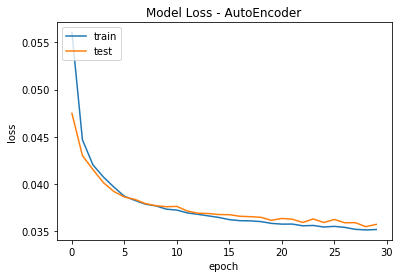

In [16]:
# your code here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - AutoEncoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
ae.save('ae.h5')  # creates a HDF5 file 'my_model.h5'
ae = tf.keras.models.load_model('ae.h5')


**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


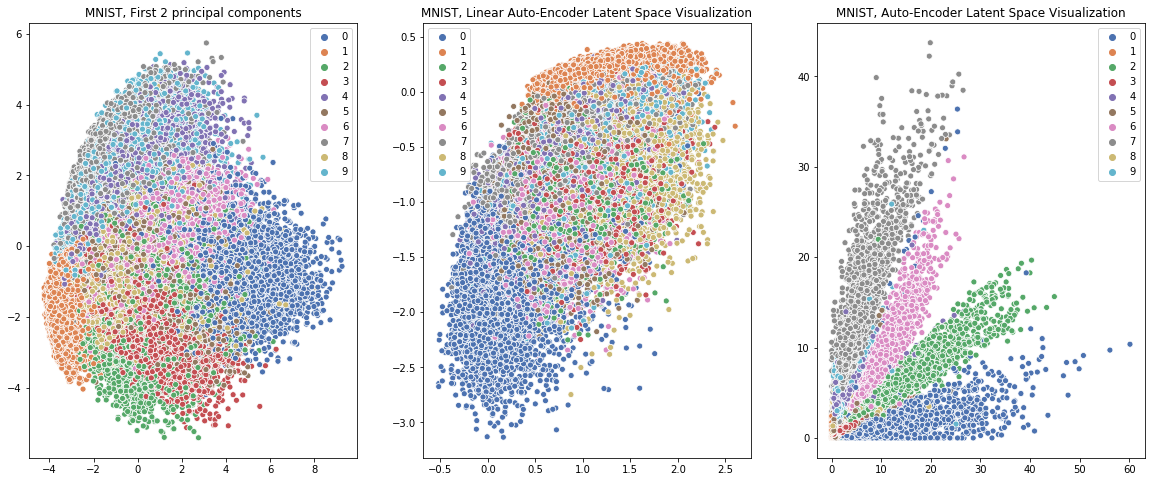

In [17]:
intermediate_model=tf.keras.models.Model(inputs=ae.input,outputs=ae.get_layer('dense_5').output)
ae_latent_train = intermediate_model.predict(x_train_flat)


# your code here
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax1)
ax1.set_title("MNIST, First 2 principal components");

sns.scatterplot(x=lae_latent_train[:,0], y=lae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax2)
ax2.set_title("MNIST, Linear Auto-Encoder Latent Space Visualization");

sns.scatterplot(x=ae_latent_train[:,0], y=ae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax3)
ax3.set_title("MNIST, Auto-Encoder Latent Space Visualization");


In [18]:
# your code here

Our now non-linear auto encoder, despite still being limited by the dimensionality of the bottleneck, empirically, does a much better job of distinguishing the different number. We now see clear clustering for the majority of the numbers, and the overlaps are significantly reduced. This a testament to the power of non-linear activation function and biases in the performance of any NN, and specifically for auto-encoders. 

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


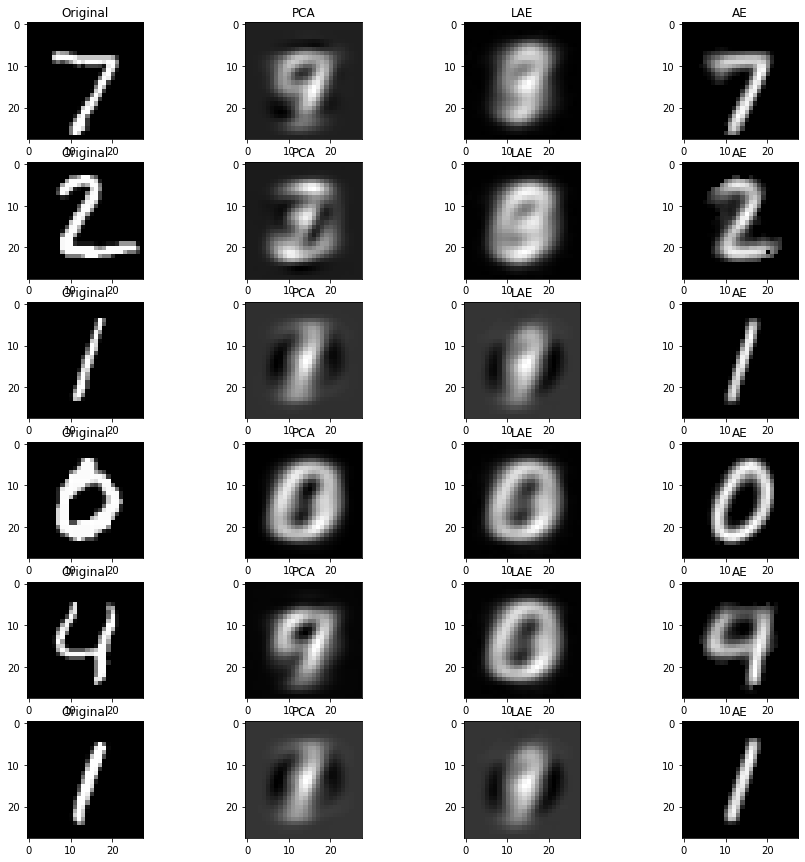

In [19]:
# your code here

pca_recons_x_test = pca.inverse_transform(pca.transform(x_test_flat))
lae_recons_x_test = lae.predict(x_test_flat)
ae_recons_x_test = ae.predict(x_test_flat)
fig, ax = plt.subplots(6, 4, figsize=(15, 15))
for j in range(6):
    ax[j, 0].set_title("Original")
    ax[j, 0].imshow(x_test_flat[j].reshape(28, 28), cmap='gray')
    ax[j, 1].set_title("PCA")
    ax[j, 1].imshow(pca_recons_x_test[j].reshape(28, 28), cmap = 'gray')
    ax[j, 2].set_title("LAE")
    ax[j, 2].imshow(lae_recons_x_test[j].reshape(28, 28), cmap = 'gray')
    ax[j, 3].set_title("AE")
    ax[j, 3].imshow(ae_recons_x_test[j].reshape(28, 28), cmap = 'gray')

In [20]:
# your code here


**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [21]:
# your code here
print("PCA MSE:", mean_squared_error(pca_recons_x_test, x_test_flat))
print("LAE MSE:", mean_squared_error(lae_recons_x_test, x_test_flat))
print("AE MSE:", mean_squared_error(ae_recons_x_test, x_test_flat))

PCA MSE: 0.05566949157907095
LAE MSE: 0.05777998229331898
AE MSE: 0.03575150122891029


Yes, this supports my conclusion that PCA was better than my linear AE, but that my non-linear autoencoder performs significantly better than both. 

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [22]:
# your code here
x_cs109b = np.loadtxt('data/cs109b-mnist-mix.csv', delimiter=',')
x_cs109b = x_cs109b/255
x_cs109b = x_cs109b.reshape(-1, 28, 28)
print(np.shape(x_cs109b))

(3067, 28, 28)


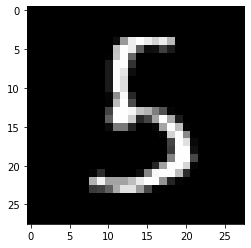

In [23]:
# your code here
plt.imshow(x_cs109b[15,:,:], cmap="gray")
plt.show()

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [24]:
# your code here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Flatten, Activation, Input, UpSampling2D

input_layer = Input(shape=(28, 28, 1))
# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu',
                        padding='same')(input_layer)
encoded_layer1 = MaxPooling2D((2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu',
                        padding='same')(encoded_layer1)
encoded_layer3 = Flatten()(encoded_layer2)
encoded_layer4 = Dense(1024, activation='tanh')(encoded_layer3)
latent_space = Dense(512, activation='tanh')(encoded_layer4)
decoded_layer1 = Dense(1024, activation='tanh')(latent_space)
decoded_layer2 = Dense(6272, activation='tanh')(decoded_layer1)
decoded_layer3 = Reshape((14, 14, 32))(decoded_layer2)
decoded_layer4 = Conv2D(64, (3, 3), activation='relu', padding='same')(decoded_layer3)
decoded_layer5 = UpSampling2D((2, 2))(decoded_layer4)
# Note that the loss will be computed after every batch between the predicted output pixel and
# the ground truth pixel using mean squared error pixel by pixel:
output_layer = Conv2D(1, (3, 3), activation='sigmoid',
                      padding='same')(decoded_layer5)
cae = Model(input_layer, output_layer)
cae.compile(optimizer='Adam', loss='mean_squared_error') 
cae.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5248

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [25]:
# your code here
x_train_4d = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test_4d = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

history = cae.fit(x_test_4d, x_test_4d, epochs=epochs, batch_size=256, 
                      validation_data=(x_test_4d, x_test_4d))

Train on 10000 samples, validate on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 6s 594us/sample - loss: 0.0790 - val_loss: 0.0656
Epoch 2/30
10000/10000 [==============================] - 2s 243us/sample - loss: 0.0579 - val_loss: 0.0516
Epoch 3/30
10000/10000 [==============================] - 2s 245us/sample - loss: 0.0451 - val_loss: 0.0405
Epoch 4/30
10000/10000 [==============================] - 2s 246us/sample - loss: 0.0359 - val_loss: 0.0337
Epoch 5/30
10000/10000 [==============================] - 2s 243us/sample - loss: 0.0288 - val_loss: 0.0264
Epoch 6/30
10000/10000 [==============================] - 2s 244us/sample - loss: 0.0237 - val_loss: 0.0229
Epoch 7/30
10000/10000 [==============================] - 2s 242us/sample - loss: 0.0202 - val_loss: 0.0195
Epoch 8/30
10000/10000 [==============================] - 2s 246us/sample - loss: 0.0171 - val_loss: 0.0175
Epoch 9/30
10000/10000 [==============================] - 2s 246us/sample - loss: 0.01

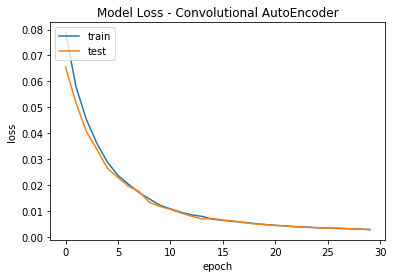

In [26]:
# your code here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss - Convolutional AutoEncoder')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


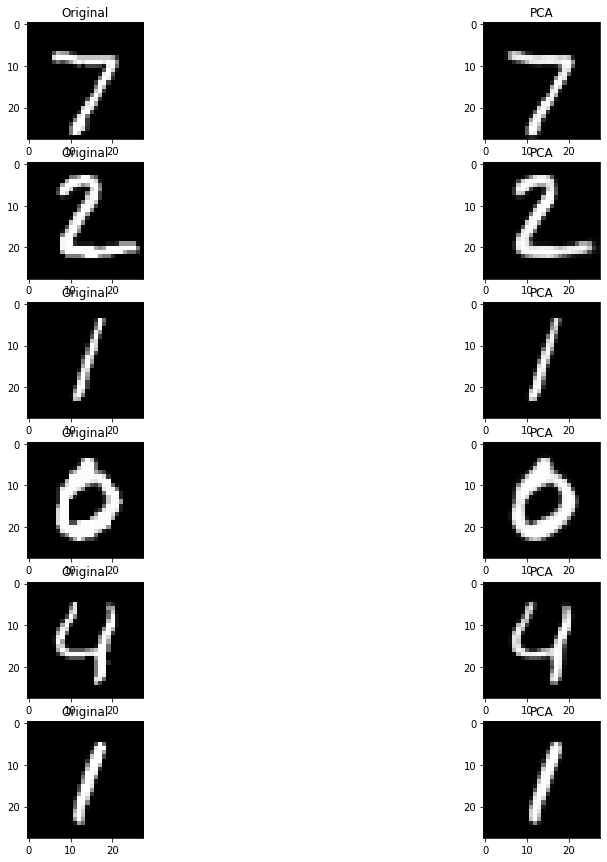

In [27]:
test_shape = np.shape(x_test)
cae_recons_x_test = cae.predict(x_test.reshape(test_shape[0], test_shape[1], test_shape[2], 1))
fig, ax = plt.subplots(6, 2, figsize=(15, 15))
for j in range(6):
    ax[j, 0].set_title("Original")
    ax[j, 0].imshow(x_test[j], cmap='gray')
    ax[j, 1].set_title("PCA")
    ax[j, 1].imshow(cae_recons_x_test[j].reshape(28,28), cmap = 'gray')



In [28]:
# your code here


My reconstruction is MUCH better than my basic AEs in problem 1. Given my bottleneck layer is still 512 nodes, I am able to capture a lot more of the variance and distinguishing characteristics in the numbers than I was with a bottleneck of 2. Moreover, I see less blurriness around the images and fewer digits that seem that they are part of two different digits. I'm very impressed by my AE in general.

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [29]:
# your code here
mse_loss = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.NONE)

cae_recons_test_shape = np.shape(cae_recons_x_test)

mse_x_test = mse_loss(cae_recons_x_test.reshape(
    cae_recons_test_shape[0], cae_recons_test_shape[1]*cae_recons_test_shape[2]), x_test.reshape(test_shape[0], test_shape[1] * test_shape[2]))

x_cs109b_shape = np.shape(x_cs109b)


cae_recons_x_cs109b =  cae.predict(x_cs109b.reshape(x_cs109b_shape[0], x_cs109b_shape[1], x_cs109b_shape[2], 1))


mse_x_cs109b = mse_loss(cae_recons_x_cs109b.reshape(
    x_cs109b_shape[0], x_cs109b_shape[1]*x_cs109b_shape[2]), x_cs109b.reshape(x_cs109b_shape[0], x_cs109b_shape[1] * x_cs109b_shape[2]))



In [30]:
# your code here

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


Images Above Threshold: 77
Threshold: 0.005266895540989934


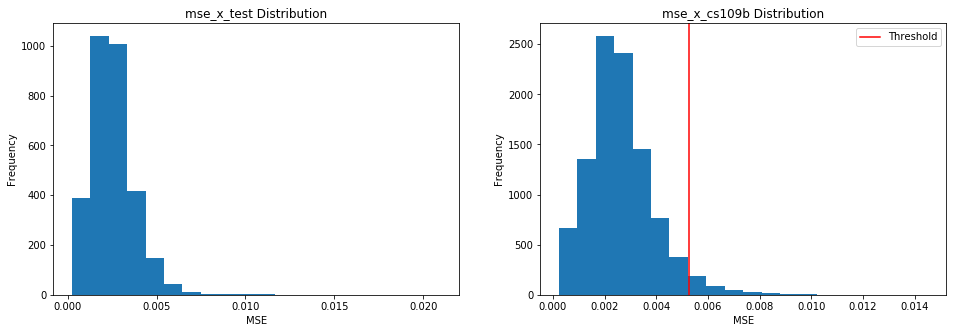

In [31]:
# your code here
fig, axs = plt.subplots(1, 2, figsize=(16,5))

# We can set the number of bins with the `bins` kwarg
axs[0].hist(mse_x_cs109b, bins=20)
axs[0].set_xlabel('MSE')
axs[1].set_xlabel('MSE')
axs[1].set_ylabel('Frequency')
axs[0].set_ylabel('Frequency')


axs[1].hist(mse_x_test, bins=20)
axs[1].set_title("mse_x_cs109b Distribution")
axs[0].set_title("mse_x_test Distribution")

cutoff = np.percentile(mse_x_cs109b, 97.5)
axs[1].set_title("mse_x_cs109b Distribution")
axs[1].axvline(x=cutoff, color='r', label="Threshold")
axs[1].legend()

print("Images Above Threshold:", len(mse_x_cs109b[mse_x_cs109b > cutoff]))
print("Threshold:", cutoff)


My threshold is the 97.5th percentile, which would represent the right bound of the 95% confidence interval. 

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

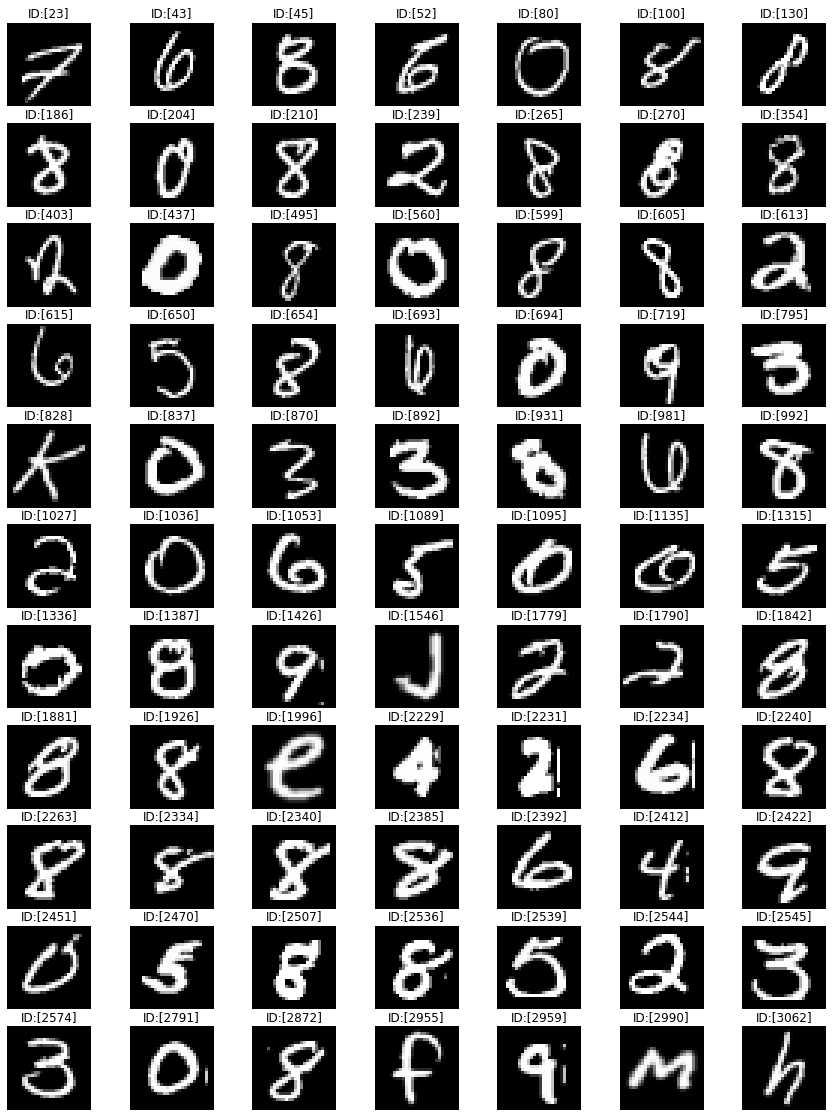

In [36]:
# your code here
# your code here
ids = np.argwhere(mse_x_cs109b > cutoff)
fig, axs =  plt.subplots(11, 7, figsize=(15,20))
table = np.zeros((len(ids),2))
table[:,0] = ids.flatten()
for i in range(77):
    axs.flat[i].imshow(x_cs109b[ids[i]].reshape(28,28),cmap = 'gray')
    axs.flat[i].set_title("ID:"+str(ids[i]))
    axs.flat[i].axis('off')


|Letter|ID|
|--|--|
|h|3062|
|m|2990|
|f|2955|
|e|1996|
|j|1546|
|k|828|
|a? (maybe)|1027|